In [143]:
import igraph as ig
import matplotlib.pyplot as plt
import numpy as np

In [176]:
g = ig.Graph.Barabasi(10000)
print(g.summary())

IGRAPH U--- 10000 9999 -- 


In [237]:
max_degree = max(g.degree())

degree_list = np.zeros(max_degree, dtype=int)

for node in g.vs():
    degree_list[node.degree()-1] = (degree_list[node.degree()-1] + 1)

degree_list = degree_list / g.vcount()

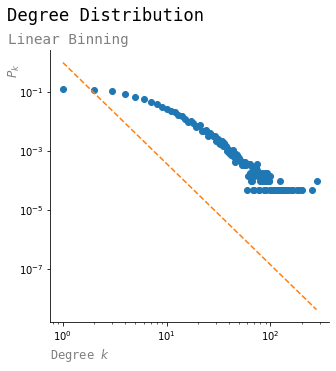

In [241]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.loglog()
ax.spines[['right', 'top']].set_visible(False)
ax.plot(range(max_degree), degree_list, "o", ls='None')
ax.plot(range(max_degree), test, ls="--")
ax.set_xlabel('Degree $k$', loc="left", size="large", family='monospace', alpha=0.5, parse_math=True)
ax.set_ylabel('$P_k$', loc="top", size="large", family='monospace',  alpha=0.5,
               parse_math=True)
ax.yaxis.set_label_coords(-0.1,0.95)
ax.set_title("Linear Binning", loc='left', size="x-large", family='monospace', x=-0.15, y=1, alpha=0.5)
plt.suptitle("Degree Distribution", size="xx-large", family='monospace', x=0.28, y=1)
plt.show()

In [239]:
result = ig.power_law_fit(g.degree())
result

FittedPowerLaw(continuous=False, alpha=3.425678134749614, xmin=27.0, L=-4077.8717330854743, D=0.029466792585702895, p=0.30967509786659786)

In [240]:
test = np.arange(max_degree)
test = test ** -result.alpha
test

c:\Users\danie\anaconda3\envs\tesis_env\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  


array([           inf, 1.00000000e+00, 9.30610881e-02, 2.32025731e-02,
       8.66036611e-03, 4.03230839e-03, 2.15925670e-03, 1.27340374e-03,
       8.05943093e-04, 5.38359400e-04, 3.75251006e-04, 2.70722186e-04,
       2.00942778e-04, 1.52752601e-04, 1.18504338e-04, 9.35599303e-05,
       7.50019412e-05, 6.09365741e-05, 5.01003115e-05, 4.16295532e-05,
       3.49212669e-05, 2.95462435e-05, 2.51937012e-05, 2.16350910e-05,
       1.86999536e-05, 1.62595109e-05, 1.42153233e-05, 1.24913233e-05,
       1.10281426e-05, 9.77901595e-06, 8.70678891e-06, 7.78170664e-06,
       6.97976225e-06, 6.28145133e-06, 5.67082389e-06, 5.13475660e-06,
       4.66238950e-06, 4.24468672e-06, 3.87409151e-06, 3.54425340e-06,
       3.24981110e-06, 2.98621867e-06, 2.74960557e-06, 2.53666331e-06,
       2.34455325e-06, 2.17083112e-06, 2.01338511e-06, 1.87038465e-06,
       1.74023802e-06, 1.62155710e-06, 1.51312778e-06, 1.41388532e-06,
       1.32289345e-06, 1.23932684e-06, 1.16245614e-06, 1.09163534e-06,
      

In [207]:
from math import log2, ceil

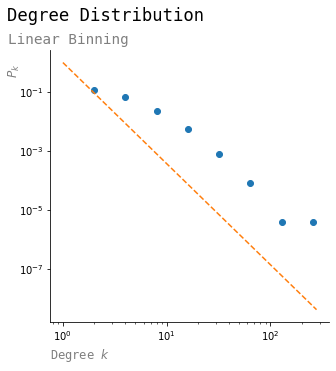

In [242]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.loglog()
ax.spines[['right', 'top']].set_visible(False)
n_log_bin = ceil(log2(max(g.degree())))
x_values, y_values = calculate_log_binning(degree_list, n_log_bin)
ax.plot(x_values, y_values, "o", ls='None')
ax.plot(range(max_degree), test, ls="--")
ax.set_xlabel('Degree $k$', loc="left", size="large", family='monospace', alpha=0.5, parse_math=True)
ax.set_ylabel('$P_k$', loc="top", size="large", family='monospace',  alpha=0.5,
               parse_math=True)
ax.yaxis.set_label_coords(-0.1,0.95)
ax.set_title("Linear Binning", loc='left', size="x-large", family='monospace', x=-0.15, y=1, alpha=0.5)
plt.suptitle("Degree Distribution", size="xx-large", family='monospace', x=0.28, y=1)
plt.show()

In [208]:
def calculate_log_binning(degree_distribution, n_bins):
    """Compute the log-binning y-values in the degree distribution.

    Divides the degree distribution in `n_bins` segments.

    Parameters
    ----------
    degree_distribution: list
        Network degree distribution.
    n_bins:
        Number of bins to assign.

    Returns
    -------
    (list, list)
        The (x_values, y_values_log_bin_list) tuple.
    """
    current_sum = 0
    previous_k = 0
    y_values_log_bin_list = []
    x_values = []

    for i in range(1, n_bins):
        x_values.append(previous_k)
        current_k = 2 ** (i)
        current_sum = current_sum + current_k
        temp_y_value = sum(degree_distribution[previous_k:current_k])
        temp_y_value = temp_y_value / (current_k-previous_k)
        y_values_log_bin_list.append(temp_y_value)
        previous_k = current_k

        if current_sum > len(degree_distribution):
            x_values.append(previous_k)
            temp_y_value = sum(
                degree_distribution[previous_k:len(degree_distribution)])
            temp_y_value = temp_y_value / (len(degree_distribution)-previous_k)
            y_values_log_bin_list.append(temp_y_value)
            break

    return x_values, y_values_log_bin_list

In [211]:
from collections import Counter

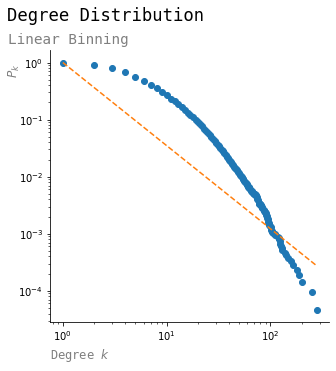

In [245]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.loglog()
ax.spines[['right', 'top']].set_visible(False)
degree_sequence = sorted(
    [d for d in g.degree()], reverse=True)  # degree sequence
degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
cs = np.cumsum(np.array(cnt)/g.vcount())
ax.plot(deg, cs, "o", ls='None')
ax.plot(range(max_degree), test, ls="--")
ax.set_xlabel('Degree $k$', loc="left", size="large", family='monospace', alpha=0.5, parse_math=True)
ax.set_ylabel('$P_k$', loc="top", size="large", family='monospace',  alpha=0.5,
               parse_math=True)
ax.yaxis.set_label_coords(-0.1,0.95)
ax.set_title("Linear Binning", loc='left', size="x-large", family='monospace', x=-0.15, y=1, alpha=0.5)
plt.suptitle("Degree Distribution", size="xx-large", family='monospace', x=0.28, y=1)
plt.show()

In [244]:
result = ig.power_law_fit(cs)
print(result.summary())
test = np.arange(max_degree)
test = test ** -result.alpha
test

Fitted power-law distribution on continuous data

Exponent (alpha)  = 1.455026
Cutoff (xmin)     = 0.002949

Log-likelihood    = 154.665238

H0: data was drawn from the fitted distribution

KS test statistic = 0.073816
p-value           = 0.749860

H0 could not be rejected at significance level 0.05


c:\Users\danie\anaconda3\envs\tesis_env\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.


array([           inf, 1.00000000e+00, 3.64748428e-01, 2.02197606e-01,
       1.33041416e-01, 9.61568519e-02, 7.37512589e-02, 5.89332099e-02,
       4.85266472e-02, 4.08838719e-02, 3.50730605e-02, 3.05313648e-02,
       2.69006557e-02, 2.39432493e-02, 2.14957956e-02, 1.94426853e-02,
       1.77000183e-02, 1.62055739e-02, 1.49123280e-02, 1.37841451e-02,
       1.27928437e-02, 1.19161540e-02, 1.11362673e-02, 1.04387894e-02,
       9.81197189e-03, 9.24614016e-03, 8.73326252e-03, 8.26662102e-03,
       7.84055767e-03, 7.45027667e-03, 7.09168888e-03, 6.76128839e-03,
       6.45605384e-03, 6.17336887e-03, 5.91095760e-03, 5.66683193e-03,
       5.43924819e-03, 5.22667135e-03, 5.02774524e-03, 4.84126768e-03,
       4.66616963e-03, 4.50149753e-03, 4.34639842e-03, 4.20010724e-03,
       4.06193599e-03, 3.93126441e-03, 3.80753204e-03, 3.69023125e-03,
       3.57890132e-03, 3.47312323e-03, 3.37251509e-03, 3.27672825e-03,
       3.18544378e-03, 3.09836944e-03, 3.01523702e-03, 2.93579992e-03,
      

In [236]:
g = ig.read("ca-CondMat.mtx", format="edge")
g.summary()

'IGRAPH D--- 21364 91286 -- '